In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

<h2>Data PreProcessing</h2>

In [3]:
data = './data/data.csv'
df = pd.read_csv(data)
df_food = pd.read_csv('./data/food_unit.csv')
df

,Exercise,Gender,Age,Height,Weight,Like_1,Hate_1
0,0,Male,26,182,55,도토리 묵,애호박
1,0,Male,57,158,42,비엔나소시지,크래커
2,2,Female,52,142,68,멸치,참기름
3,2,Female,60,188,82,참기름,검정콩
4,1,Male,42,153,48,귤,참기름
...,...,...,...,...,...,...,...
9995,2,Male,34,171,82,삼겹살,인절미
9996,2,Male,44,158,53,참기름,닭고기(닭다리)
9997,1,Female,43,140,74,새우(중하),참기름
9998,2,Male,27,179,42,고구마,토마토


In [4]:
def get_need_kcal(hei, exer, gender):
    hei = hei / 100

    if gender == 'Male':
        need = hei * hei * 22
    elif gender == 'Female':
        need = hei * hei * 21

    if exer == 0: #low exercise
        need = need * 25
    elif exer == 1: #middle exercise
        need = need * 30
    elif exer == 2: #high exercise
        need = need * 35
    
    return round(need, -2)

In [5]:
need_cal = []

for i in range(10000):
    hei = df.iloc[i, 3]
    exer = df.iloc[i, 0]
    gender = df.iloc[i, 1]

    need = get_need_kcal(hei, exer, gender)
    need_cal.append(need)

df['need'] = need_cal

In [6]:
df.describe(include=object)

,Gender,Like_1,Hate_1
count,10000,10000,10000
unique,2,69,69
top,Male,우유,우유
freq,5001,1620,1662


In [7]:
groups = df.groupby(df.Gender)
df_male = groups.get_group('Male')
df_female = groups.get_group('Female')

In [8]:
df_female

,Exercise,Gender,Age,Height,Weight,Like_1,Hate_1,need
2,2,Female,52,142,68,멸치,참기름,1500.0
3,2,Female,60,188,82,참기름,검정콩,2600.0
5,2,Female,38,155,86,땅콩,오렌지,1800.0
8,0,Female,29,188,60,땅콩,참기름,1900.0
9,2,Female,21,180,89,햄(로스),바나나,2400.0
...,...,...,...,...,...,...,...,...
9990,2,Female,49,140,57,참치통조림,굴,1400.0
9991,1,Female,49,144,99,참기름,곶감,1300.0
9993,2,Female,58,176,83,감자,우유,2300.0
9994,0,Female,52,158,70,바나나,단호박,1300.0


In [9]:
df_male

,Exercise,Gender,Age,Height,Weight,Like_1,Hate_1,need
0,0,Male,26,182,55,도토리 묵,애호박,1800.0
1,0,Male,57,158,42,비엔나소시지,크래커,1400.0
4,1,Male,42,153,48,귤,참기름,1500.0
6,2,Male,53,144,62,연근,애호박,1600.0
7,1,Male,53,149,45,삶은 국수,애호박,1500.0
...,...,...,...,...,...,...,...,...
9992,0,Male,25,184,55,완두콩,마른국수,1900.0
9995,2,Male,34,171,82,삼겹살,인절미,2300.0
9996,2,Male,44,158,53,참기름,닭고기(닭다리),1900.0
9998,2,Male,27,179,42,고구마,토마토,2500.0


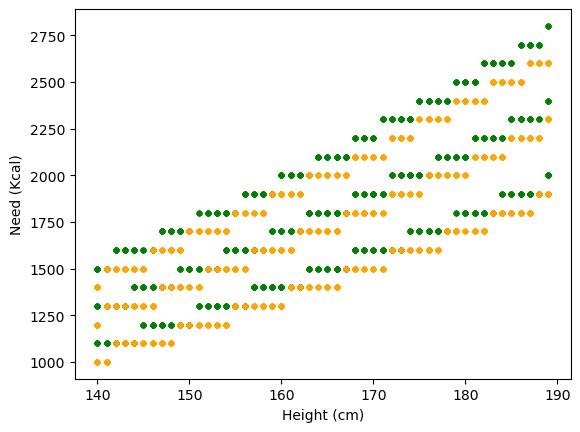

In [10]:
plt.scatter(df_male['Height'], df_male['need'], c='green', s=3**2, alpha=0.5)
plt.scatter(df_female['Height'], df_female['need'], c='orange', s=3**2, alpha=0.5)
plt.xlabel('Height (cm)')
plt.ylabel('Need (Kcal)')
plt.show()

<h3>Content-based Filtering</h3>

In [11]:
foodli = list(df_food['식품군'].unique())

In [12]:
#food unit data per need kcal

need_cal = list(set(df['need']))
need_cal.sort()

grain = [5,5,6,6,7,7,8,8,8,9,10,10,10,11,11,11,11,11,11]
fm = [3,4,4,4,4,5,5,5,5,5,5,6,7,7,8,8,8,10,10]
vege = [3,3,3,5,6,6,7,7,7,7,7,8,8,8,8,8,8,8,9]
fat = [2,3,3,4,4,4,4,4,4,4,4,5,5,6,6,7,7,7,8]
milk = [1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3]
fruit = [1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3]
need_list = [grain, fm, vege, fat, milk, fruit]

kcal_need = pd.DataFrame(need_cal, columns=['need_kcal'])

for li in foodli:
    kcal_need[li] = need_list[foodli.index(li)]

kcal_need

,need_kcal,곡류군,어육류군,채소군,지방군,우유군,과일군
0,1000.0,5,3,3,2,1,1
1,1100.0,5,4,3,3,1,1
2,1200.0,6,4,3,3,1,1
3,1300.0,6,4,5,4,1,1
4,1400.0,7,4,6,4,1,1
5,1500.0,7,5,6,4,1,1
6,1600.0,8,5,7,4,1,1
7,1700.0,8,5,7,4,2,1
8,1800.0,8,5,7,4,2,2
9,1900.0,9,5,7,4,2,2


In [24]:
#base recommendated diet

food_g = df_food.groupby('식품군')

base_recom = pd.DataFrame(columns=foodli)
recom_li = []

for li in foodli:
    f = food_g.get_group(li)
    recom_li.append(f.iloc[0,0])

base_recom.loc[0] = recom_li

base_recom

,곡류군,어육류군,채소군,지방군,우유군,과일군
0,쌀밥,돼지고기,연근,참기름,우유,곶감


In [26]:
#random change recommendation in each food unit

import random

for li in foodli:
    f = food_g.get_group(li)
    i = random.randrange(len(f))
    base_recom.iloc[0, foodli.index(li)] = f.iloc[i, 0]

base_recom

,곡류군,어육류군,채소군,지방군,우유군,과일군
0,식빵,꽁치,시금치,땅콩,우유,배


<h3>collaborative filtering</h3>

In [ ]:
#merge like/hate food data

like_df = df[['Like_1', 'Hate_1']]
hate_df = df[['Like_1', 'Hate_1']]

like_df.drop(['Hate_1'], axis=1, inplace=True)
hate_df.drop(['Like_1'], axis=1, inplace=True)
like_df['score'] = 10
hate_df['score'] = 0

li = []
for i in range(10000):
    li.append(i)

like_df['Index'] = li
hate_df['Index'] = li

like_df.rename(columns={'Like_1':'Food'}, inplace=True)
hate_df.rename(columns={'Hate_1':'Food'}, inplace=True)

df_food.drop(['용량(g)'], axis=1, inplace=True)
df_food.rename(columns={'품목':'Food'}, inplace=True)

like = pd.merge(like_df, df_food, on='Food', how='left')
hate = pd.merge(hate_df, df_food, on='Food', how='left')

In [16]:
like_hate = pd.concat([like, hate])
like_hate

,Food,score,Index,식품군
0,도토리 묵,10,0,곡류군
1,비엔나소시지,10,1,어육류군
2,멸치,10,2,어육류군
3,참기름,10,3,지방군
4,귤,10,4,과일군
...,...,...,...,...
9995,인절미,0,9995,곡류군
9996,닭고기(닭다리),0,9996,어육류군
9997,참기름,0,9997,지방군
9998,토마토,0,9998,과일군


In [17]:
#calculate rating(preference)
#0: hate, 5: soso, 10: like

food = like_hate.pivot_table('score', index='Food', columns='Index')
food.fillna(5, inplace=True)

food

Index,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Food,,,,,,,,,,,,,,,,,,,,,
가래떡,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
가자미,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
갈치,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
감자,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,10.0,5.0,5.0,5.0,5.0,5.0,5.0
강냉이(옥수수),5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
크래커,5.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
키위,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
토마토,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0


In [18]:
#calculate cosine similarity
item_base_colla = cosine_similarity(food)
item_base_colla

array([[1.        , 0.98619442, 0.98413018, ..., 0.97577511, 0.97237538,
        0.984261  ],
       [0.98619442, 1.        , 0.98911792, ..., 0.98072716, 0.97740174,
        0.98924048],
       [0.98413018, 0.98911792, 1.        , ..., 0.97857835, 0.9753598 ,
        0.9870775 ],
       ...,
       [0.97577511, 0.98072716, 0.97857835, ..., 1.        , 0.96514421,
        0.97880305],
       [0.97237538, 0.97740174, 0.9753598 , ..., 0.96514421, 1.        ,
        0.97548298],
       [0.984261  , 0.98924048, 0.9870775 , ..., 0.97880305, 0.97548298,
        1.        ]])

In [19]:
#calculate preferences(similarity) of each food

item_base_colla_df = pd.DataFrame(data=item_base_colla, index=food.index, columns=food.index)

item_base_colla_df

Food,가래떡,가자미,갈치,감자,강냉이(옥수수),건오징어채,검정콩,고구마,고등어,곶감,...,찜갈비,참기름,참치통조림,치즈,콘플레이크,크래커,키위,토마토,표고버섯,햄(로스)
Food,,,,,,,,,,,,,,,,,,,,,
가래떡,1.000000,0.986194,0.984130,0.980809,0.979502,0.984639,0.985205,0.978922,0.983289,0.974789,...,0.984960,0.926912,0.984441,0.985696,0.981458,0.982094,0.976860,0.975775,0.972375,0.984261
가자미,0.986194,1.000000,0.989118,0.985984,0.983874,0.989623,0.990197,0.984965,0.988265,0.979723,...,0.989951,0.931518,0.989425,0.990689,0.986424,0.986676,0.982183,0.980727,0.977402,0.989240
갈치,0.984130,0.989118,1.000000,0.983922,0.982506,0.987557,0.988129,0.982909,0.986202,0.976407,...,0.987883,0.929665,0.987360,0.988620,0.984365,0.985009,0.980137,0.978578,0.975360,0.987078
감자,0.980809,0.985984,0.983922,1.000000,0.978509,0.984428,0.984996,0.979794,0.983078,0.974580,...,0.984751,0.926810,0.984231,0.985289,0.981246,0.981886,0.977035,0.975376,0.971878,0.984049
강냉이(옥수수),0.979502,0.983874,0.982506,0.978509,1.000000,0.983009,0.983579,0.977893,0.979502,0.972689,...,0.983039,0.923438,0.982813,0.984068,0.979832,0.980473,0.974163,0.973878,0.970480,0.982630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
크래커,0.982094,0.986676,0.985009,0.981886,0.980473,0.985514,0.986084,0.980777,0.984063,0.975167,...,0.984852,0.925511,0.985317,0.986574,0.982328,1.000000,0.976938,0.976651,0.972854,0.984444
키위,0.976860,0.982183,0.980137,0.977035,0.974163,0.980632,0.980716,0.976017,0.979285,0.970821,...,0.980962,0.922968,0.980437,0.980812,0.977461,0.976938,1.000000,0.971827,0.968527,0.980251
토마토,0.975775,0.980727,0.978578,0.975376,0.973878,0.979180,0.979745,0.974278,0.977837,0.969385,...,0.977733,0.916136,0.978984,0.980232,0.976016,0.976651,0.971827,1.000000,0.965144,0.978803


In [22]:
def get_food_unit(food):
    return df_food[df_food['Food']==food].iloc[0, 1]

def get_item_colla_like(Food):
    unit = get_food_unit(Food)
    same_unit = []

    for i in range(len(df_food[df_food['식품군']==unit])):
        same_unit.append(df_food[df_food['식품군']==unit].iloc[i, 0])

    same_unit_df = item_base_colla_df[same_unit].loc[same_unit]
    return same_unit_df[Food].sort_values(ascending=False)[:2].index[1]
    #in descending sort, first feature is itself (similarity: 1)

def get_item_colla_hate(Food):
    #in hate df, the lowest similarity might be the highest preference
    unit = get_food_unit(Food)
    same_unit = []

    for i in range(len(df_food[df_food['식품군']==unit])):
        same_unit.append(df_food[df_food['식품군']==unit].iloc[i, 0])

    same_unit_df = item_base_colla_df[same_unit].loc[same_unit]
    return same_unit_df[Food].sort_values(ascending=True)[:1].index[0]

In [28]:
#get result

def get_recom(data, recom):
    exer = data[0]
    gender = data[1]
    height = data[2]
    like = data[4]
    hate = data[5]

    #collaborative filtering
    li_recom = get_item_colla_like(like)
    ha_recom = get_item_colla_hate(hate)
    
    col = foodli.index(get_food_unit(like))
    recom.iloc[0, col] = li_recom

    col = foodli.index(get_food_unit(hate))
    recom.iloc[0, col] = ha_recom

    #calculate need kcal
    need = get_need_kcal(height, exer, gender)

    need_li = list(kcal_need[kcal_need['need_kcal']==need].iloc[0, 1:])
    need_li = list(map(int, need_li))
    recom.loc[1] = need_li

    #calculate food volumes    
    df_fu = pd.read_csv('./data/food_unit.csv')

    for i in range(len(recom.columns)):
        food = recom.iloc[0, i]
        food_unit = df_fu[df_fu['품목']==food].iloc[0, 1]
        vol = food_unit * recom.iloc[1, i]
        recom.iloc[1, i] = vol

    return recom

def print_result(data, recom):
    recom = get_recom(data, recom)
    print('The need of kcal:', str(need), '(kcal)')

    print('==Recommendation Diet==')
    for i in range(len(recom.columns)):
        print(str(recom.columns[i]), ':', str(recom.iloc[0, i]), str(recom.iloc[1, i]), 'g')


test_data = [2, 'Male', 180, 80, '표고버섯', '건오징어채']
#exercise, gender, height, weight, like, hate

print_result(test_data, base_recom)

The need of kcal: 1500.0 (kcal)
==Recommendation Diet==
곡류군 : 식빵 385 g
어육류군 : 새우(중하) 400 g
채소군 : 도라지 320 g
지방군 : 땅콩 56 g
우유군 : 우유 400 g
과일군 : 배 330 g
